## Imports and staging Data

In [31]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.DataFrame(pd.read_csv('MonsterData.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   334 non-null    object 
 1   Type    334 non-null    int64  
 2   HP      334 non-null    int64  
 3   AC      334 non-null    int64  
 4   Size    334 non-null    int64  
 5   STR     334 non-null    int64  
 6   DEX     334 non-null    int64  
 7   CON     334 non-null    int64  
 8   INT     334 non-null    int64  
 9   WIS     334 non-null    int64  
 10  CHAR    334 non-null    int64  
 11  CR      334 non-null    float64
dtypes: float64(1), int64(10), object(1)
memory usage: 31.4+ KB


## Train/Test Split

In [9]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  267 Test size:  67


## linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['Type','CR', 'Size']]
y = train_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]
X_test = test_set[['Type','CR', 'Size']]
y_test = test_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, 
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  [ 13.33251739 -23.59273191   1.04885891  15.49771412   8.4060631
  10.36010321  11.5106604   10.28701487]
 Coefficients [[-9.78854541e-02  4.39893129e-01 -2.23797279e-01]
 [-1.28794387e+00  1.40474719e+01  1.46997055e+01]
 [-1.93283602e-01  3.00409088e-01  4.05670302e+00]
 [ 1.49012436e-01  1.80548530e-01 -1.33915790e+00]
 [-3.39660118e-02  4.74388525e-01  1.39252902e+00]
 [-1.98810015e-01  7.97708953e-01 -1.39840578e+00]
 [-1.06932654e-02  3.16939073e-01 -3.41920423e-01]
 [-1.41550173e-01  8.02461325e-01 -9.37202149e-01]]
 Score 0.5730921062242141
MAE is  4.319078690962247
RMSE is  11.042377938826878
MSE is  121.93411054389053
R^2  0.5730921062242141

Results for linear regression on test data
MAE is  4.500709472905756
RMSE is  11.62550157888248
MSE is  135.15228696059904
R^2  0.5304422975850371


## Elastic net polynomial regression

In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
power = 10
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['Type','CR', 'Size']]
y = train_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]
X_poly = poly_process.fit_transform(X)
X_test = test_set[['Type','CR', 'Size']]
y_test = test_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)
y_pred = reg_lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)
print(' Score', reg_lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))


y_test_pred = reg_lr_model.predict(X_poly_test)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.373e+02, tolerance: 2.811e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.900e+04, tolerance: 2.698e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+02, toler

Results for linear regression on training data
Polynomial regression with degree  10
 Default settings
Internal parameters:
 Bias is  [12.04790535 14.2336336   7.75389307 12.74829479 11.41200167 10.16145282
 10.34517454  9.56541069]
 Coefficients [[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 ...  1.07492004e-09
  -3.91929978e-09  3.53002979e-10]
 [-3.87815486e-01  9.33096719e-01  0.00000000e+00 ... -5.31237476e-08
  -3.04963313e-08  1.00368751e-06]
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.97874409e-09
   1.77383297e-09  1.98328144e-08]
 ...
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.28432931e-09
  -1.32667357e-08  9.72633800e-08]
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.47947347e-09
   7.69867194e-10  4.13029627e-08]
 [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 ... -5.40478852e-09
  -1.00373060e-08  9.10389149e-08]]
 Score 0.7267626699985212
MAE is  2.6990139328733913
RMSE is  5.538820656223631
MSE is  30.678534261809574
R^2  0.726

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.575e+02, tolerance: 2.292e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+03, tolerance: 9.139e-01
  model = cd_fast.enet_coordinate_descent(


## Decsion Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score




X = train_set[['Type','CR', 'Size']]
y = train_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]

X_test = test_set[['Type','CR', 'Size']]
y_test = test_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)


print('MAE: ', mean_absolute_error(y, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE: ', mean_squared_error(y, y_pred))
print('R^2: ', r2_score(y,y_pred))

y_test_pred = tree_model.predict(X_test)
print('Test Data Results')
print(' Default settings')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))



MAE:  1.1015917602996255
RMSE:  3.9637283360615645
MSE:  15.711142322097379
R^2:  0.8530573208446104
Test Data Results
 Default settings
MAE is  3.3861940298507465
RMSE is  7.4826914704397005
MSE is  55.990671641791046
R^2  0.3970621249518297


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier


X = train_set[['Type','CR', 'Size']]
y = train_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]

X_test = test_set[['Type','CR', 'Size']]
y_test = test_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]

rf_model = RandomForestClassifier(n_estimators=150)
rf_model.fit(X,y)

y_pred = rf_model.predict(X)


print('MAE: ', mean_absolute_error(y, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE: ', mean_squared_error(y, y_pred))
print('R^2: ', r2_score(y,y_pred))

y_test_pred = rf_model.predict(X_test)

print('Test Data Results')
print(' Default settings')

print('MAE: ', mean_absolute_error(y_test, y_test_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE: ', mean_squared_error(y_test, y_test_pred))
print('R^2: ', r2_score(y_test,y_test_pred))

MAE:  1.0557116104868913
RMSE:  3.841730746823122
MSE:  14.758895131086144
R^2:  0.8563989951372764
Test Data Results
 Default settings
MAE:  3.4365671641791042
RMSE:  8.223101786131231
MSE:  67.61940298507463
R^2:  0.41652528183778087


## K Nearest neighbor

In [14]:
from sklearn.neighbors import KNeighborsClassifier

X = train_set[['Type','CR', 'Size']]
y = train_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]

X_test = test_set[['Type','CR', 'Size']]
y_test = test_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X,y)

y_pred = knn.predict(X)


print('MAE: ', mean_absolute_error(y, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE: ', mean_squared_error(y, y_pred))
print('R^2: ', r2_score(y,y_pred))

y_test_pred = knn.predict(X_test)
print('Test Data Results')
print(' Default settings')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

MAE:  3.155430711610487
RMSE:  10.486481399155364
MSE:  109.96629213483146
R^2:  0.5813021446922224
Test Data Results
 Default settings
MAE is  4.100746268656716
RMSE is  9.895724992860723
MSE is  97.92537313432835
R^2  0.29249469502773556


## Drilling further into selected algotithm


In [37]:

X = train_set[['Type','CR', 'Size']]
y = train_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]

X_test = test_set[['Type','CR', 'Size']]
y_test = test_set[['AC', 'HP', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHAR']]

results_df = pd.DataFrame(columns = ['Estimators', 'Train vs. Test', 'MAE', 'RMSE', 'MSE', 'R^2'])


estimators = 100


for x in range(20):
    new_row = []


    new_row.append(estimators) 


    rf_model = RandomForestClassifier(n_estimators=estimators)
    rf_model.fit(X,y)

    y_pred = rf_model.predict(X)

    new_row.append('Train')
    new_row.append(mean_absolute_error(y, y_pred))
    new_row.append(np.sqrt(mean_squared_error(y, y_pred)))
    new_row.append(mean_squared_error(y, y_pred))
    new_row.append(r2_score(y,y_pred))
    
    results_df.loc[len(results_df)] = new_row
    new_row = []
    new_row.append(estimators)
    
    y_test_pred = rf_model.predict(X_test)

    new_row.append('Test')
    new_row.append(mean_absolute_error(y_test, y_test_pred))
    new_row.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    new_row.append(mean_squared_error(y_test, y_test_pred))
    new_row.append(r2_score(y_test,y_test_pred))



    results_df.loc[len(results_df)] = new_row
    estimators += 5







print(new_row)
results_df.head()

[195, 'Test', 3.5858208955223883, 8.505485499493227, 72.34328358208955, 0.4083058964981846]


,Estimators,Train vs. Test,MAE,RMSE,MSE,R^2
0,100,Train,1.053839,3.830992,14.676498,0.861422
1,100,Test,3.397388,8.177942,66.878731,0.439718
2,105,Train,1.046816,3.818077,14.577715,0.864773
3,105,Test,3.430970,8.269820,68.389925,0.441010
4,110,Train,1.051966,3.836853,14.721442,0.864644


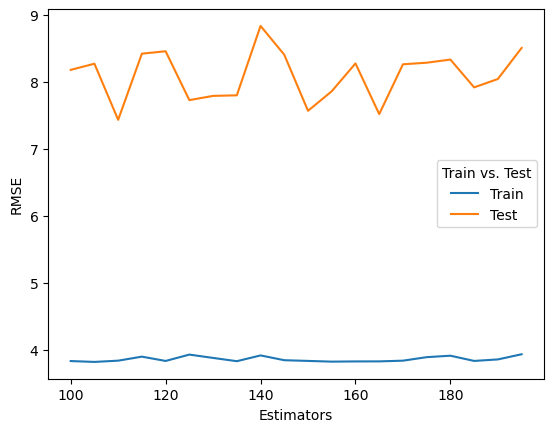

In [42]:
RMSE_line = sns.lineplot(x="Estimators", y = "RMSE", data=results_df, hue = "Train vs. Test")
#type_bar.set_xticklabels(type_bar.get_xticklabels(), rotation=40, ha="right")








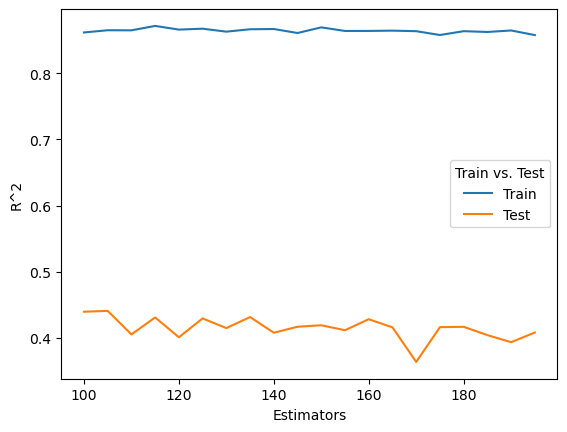

In [41]:
R2_line = sns.lineplot(x="Estimators", y = "R^2", data=results_df, hue = "Train vs. Test")

In [43]:
results_df.to_latex()

C:\Users\gdalb\AppData\Local\Temp\ipykernel_7156\3937216835.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results_df.to_latex()


'\\begin{tabular}{lrlrrrr}\n\\toprule\n{} &  Estimators & Train vs. Test &       MAE &      RMSE &        MSE &       R\\textasciicircum 2 \\\\\n\\midrule\n0  &         100 &          Train &  1.053839 &  3.830992 &  14.676498 &  0.861422 \\\\\n1  &         100 &           Test &  3.397388 &  8.177942 &  66.878731 &  0.439718 \\\\\n2  &         105 &          Train &  1.046816 &  3.818077 &  14.577715 &  0.864773 \\\\\n3  &         105 &           Test &  3.430970 &  8.269820 &  68.389925 &  0.441010 \\\\\n4  &         110 &          Train &  1.051966 &  3.836853 &  14.721442 &  0.864644 \\\\\n5  &         110 &           Test &  3.339552 &  7.432281 &  55.238806 &  0.405421 \\\\\n6  &         115 &          Train &  1.053371 &  3.896844 &  15.185393 &  0.871299 \\\\\n7  &         115 &           Test &  3.544776 &  8.419948 &  70.895522 &  0.431092 \\\\\n8  &         120 &          Train &  1.047285 &  3.832580 &  14.688670 &  0.865738 \\\\\n9  &         120 &           Test &  3.5708